# Обучене нейронной сети в Keras (Часть 4)

## Нейронные сети в задачах прогнозирования. Продолжение. 

### Рекуррентные сети и модель LSTM в задачах обработки естесственного языка

---------------------------------------------------

## Содержание занятия

Теория:
##### Нйронная сеть Long Short Temp Memory
- Идея метода
- История создания
- Направления потоков и основные векторы ядра вычислений
- Алгоритмы ядра вычислений


##### Основы NLP. Введение. Токенизация в Python. 
- Введение в Natural Language Processing;
- Токенизация как метод преобразования данных;
- Основные сущности NLP, объекты токенизации;
- Основные задачи NLP в машинном обучении;
- Токенизация в решении NER задач машинного перевода.

Практика:
##### Модель №1: Решение задачи прогнозирования при помощи нейронной сети LSTM
- Разработка модели NMT

Путь к рабочей папке: ```C:\\Users\\User\Documents\GitHub\\2022_DA_ML_CaseStudies_Python_Keras\\17_NeuralNetworks_Keras_5_NLP_NER_LSTM```

In [2]:
import os # Задаем рабочую папку с данными
os.chdir ("C:\\Users\\User\Documents\GitHub\\2022_DA_ML_CaseStudies_Python_Keras\\17_NeuralNetworks_Keras_5_NLP_NER_LSTM")
from IPython.display import Image

На прошлом занятии мы ознакомились с семейством нейронных сетей класса RNN и изучили общую модель архитектуры сетей. Общие характеристики нейронных сетей класса RNN таковы:
- Сеть наилучшим образом применяется в решении задач кперогнозирования, так как обладает свойством рекурсивности, которая позволяет работать с временными рядами;
- Наличие параллельных связей между нейронами скрытого слоя передающими информаци о вычислениях в нейронах текущего слоя, позволяют обмениваться информацией между нейронами одного и того же слоя;
- Наличие обратной связи, которая обеспечивает преемственность вычислений и позволяет передавать значения откликов и предикторов предшествующих наблюдений в предикторы последующего наблюдения
- Функция активация нейронов представляет собой линейную модель;
- Задача стандартизации данных перед обучением нейронной сети класса RNN - преобразование временного ряда в матричный массив с удалением NaN;

На этом занятии в практической части ознакомимся с архитектурой модели Long Short-Term Memory

-----------------------------------------

## Нейронная сеть Long Short Temp Memory

#### Идея метода

Долгая краткосрочная память (Long short-term memory; LSTM) – особая разновидность архитектуры рекуррентных нейронных сетей, способная к обучению долговременным зависимостям. В отличие от простой модели рекуррентной сети, в которой запоминаются только последовательности предшествующих наблюдений на временном интервале $ t + i $ (где t = исходное наблюдение, выраженное в фиксированном векторе, а i = шаг смещения фиксированного вектора), модель LSTM имеет возможность вариативно подходить к запоминанию вычислений. Иными словами, обладает большим интервалом и частотой охвата данных на временном ряде, преобразуемые во входные последовательности при каждом наблюдении (длинная краткосрочная память). 


#### История создания

Они были представлены Зеппом Хохрайтер и Юргеном Шмидхубером (Jürgen Schmidhuber) в 1997 году, а затем усовершенствованы и популярно изложены в работах многих других исследователей. Они прекрасно решают целый ряд разнообразных задач и в настоящее время широко используются.

#### Архитектура ядра вычислений

LSTM разработаны специально, чтобы избежать проблемы долговременной зависимости. Запоминание информации на долгие периоды времени – это их обычное поведение, а не что-то, чему они с трудом пытаются обучиться. 

Модель LSTM была создана для того, чтобы решить проблемму простых рекуррентных нейронных сетей: решить вопрос долговременной зависимости: обучение происходит за счет фиксированного размер интервала вектора). К счастью, LSTM не знает таких проблем и может создавать любую архитектуру векторов входных последовательносте благодаря своей архитектуре ядраа вычислений (API) расположенных в скрытом нейронной слое. 

Рассмотрим и сравним две модели ядра вычислений (API) RNN и LSTM:

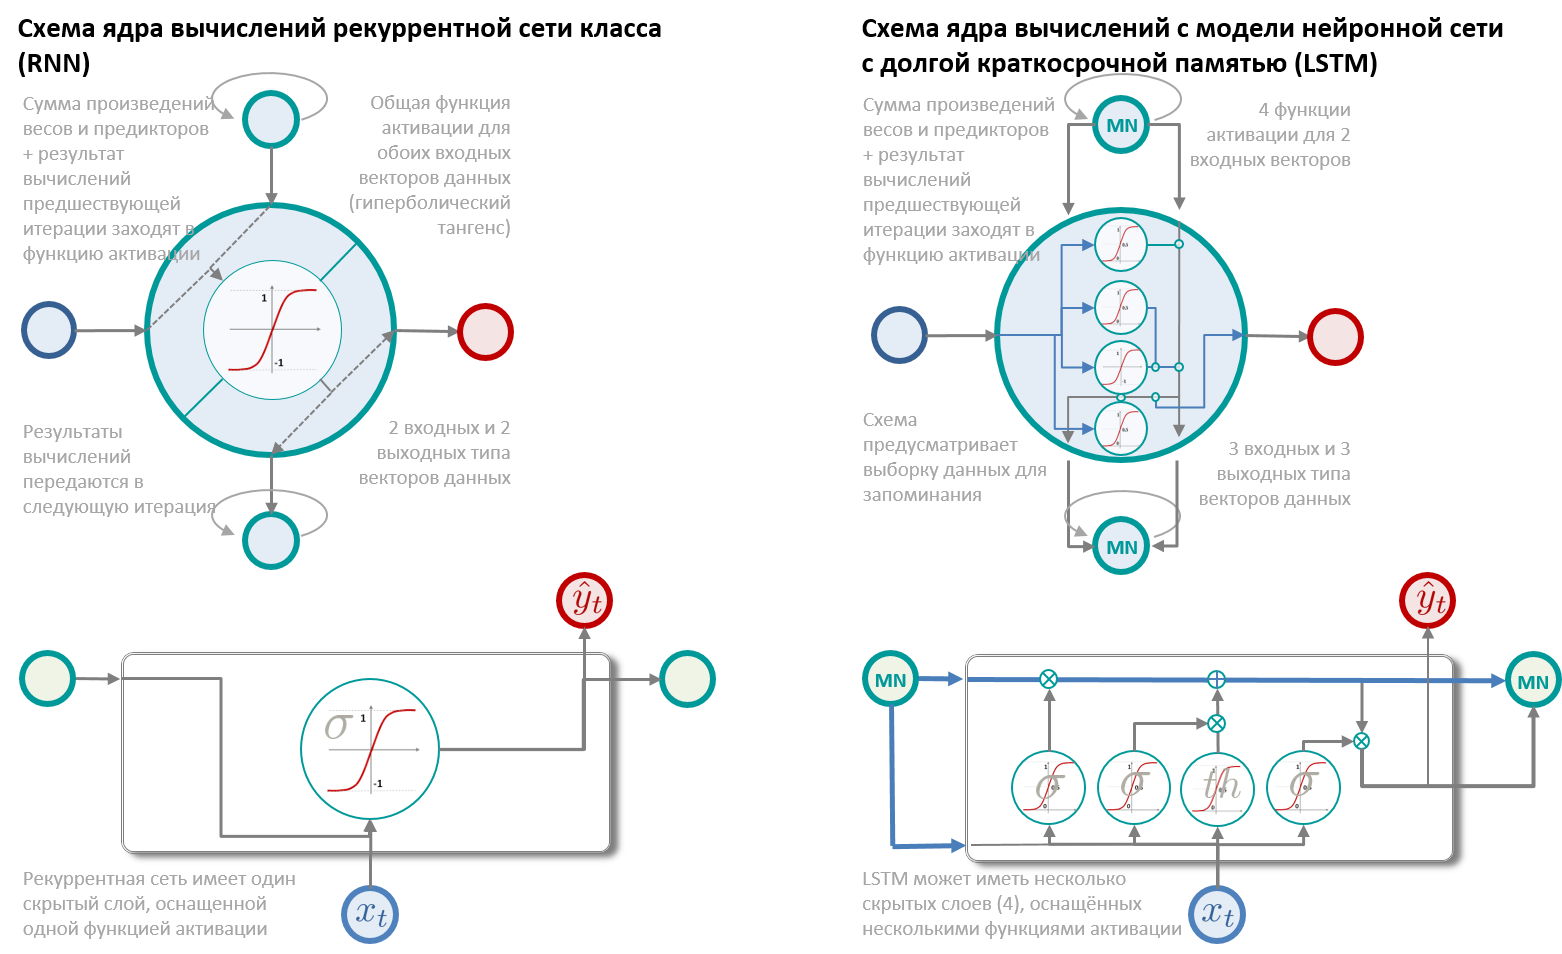

In [3]:
Image('RNN&LSTM_Core_Scheme.png')

На схеме выше каждая линия переносит целый вектор от выхода одного узла ко входу другого: 

- Кружочками с крестиками обозначены поточечные операции, такие, как сложение векторов, 
- Бирюзовые кружки = это обученные слои нейронной сети с обозначенной функцией активации. 
- Синие кружки = нейроны входного слоя
- Красные кружки = нейроны выходного слоя
- Синие линии = основные направления потоков между скрытыми слоями (ядра вычислений)
- Серые линии = потоки направления векторов поточечных операций
- Сливающиеся линии означают объединение, а разветвляющиеся стрелки говорят о том, что данные копируются и копии уходят в разные компоненты сети.


#### Направления потоков и основные векторы ядра вычислений

Батч = Вектор потока данных = Входная последовательность => Синонимы
Основной вектор ядра вычислений + Вектор потока данных = Направления потоков данных ядра вычислений

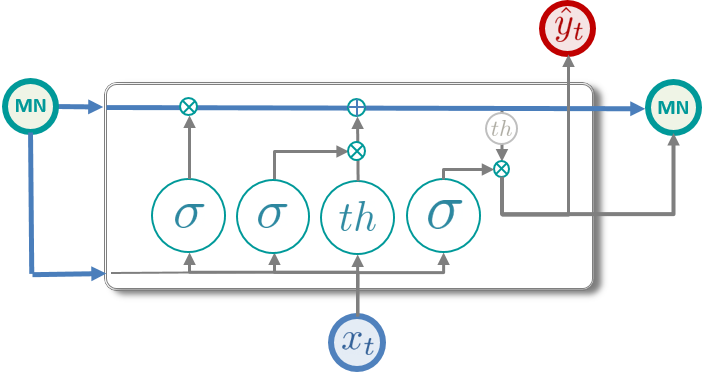

In [12]:
Image('LSTM_Core_Scheme.png')

#### Алгоритмы ядра вычислений

##### Основной вектор ядра вычислений

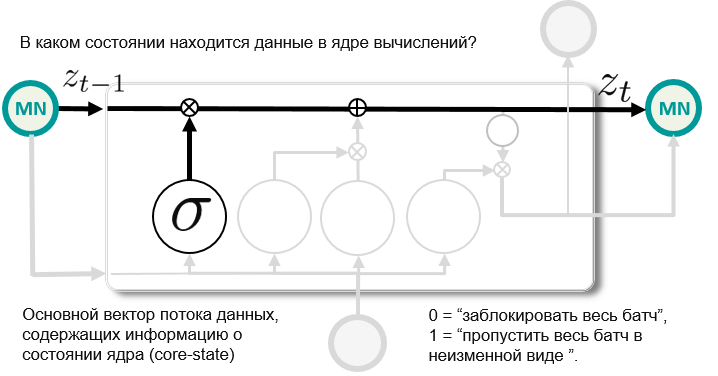

In [4]:
Image('LSTM_Core-state_Vector.png')

Ключевой компонент LSTM – это состояние ячейки (cell state) – горизонтальная линия, проходящая по верхней части схемы.

Изменять информацию из состояния ячейки можно при помощи фильтров (gates), пропускающих потоки данных других векторов модели. Активационная функция задает условия изменений (сигмоидальный слой ядра вычислений)

Логистическая функция активации (сигмоид)  присваивает числа от нуля до единицы, которые обозначают, в каком объеме пропускать данные в основной вектор (cell-state)

##### Слой фильтрации векторов данных (батчей)

Общий объем входных последовательностей может быть большим, особенно, если работа идет с несколькими входными векторами (батчами). Поэтому первой функциональной задачей ядра вычислений определить, какую информацию следует исключить из актуальных вычислений. Делается это при помощи сигмоидальной функции активации: 

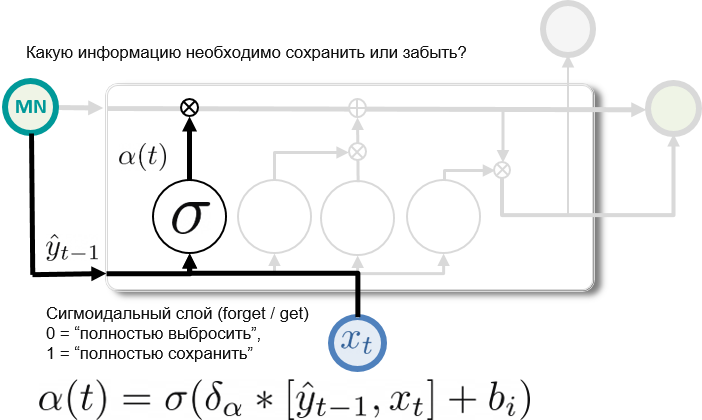

In [5]:
Image('LSTM_Core_ForgetGet_Layer.png')

$$ \alpha(t) = \sigma (\delta_{\alpha} * [y_{t-1}, x_{t}] + b_{i}) $$

###### Обновление векторов данных

Следующий шаг – решить, какая новая информация будет храниться в состоянии ячейки. Этот этап состоит из двух частей. Сначала сигмоидальный слой под названием “слой входного фильтра” (input layer gate) определяет, какие значения следует обновить. Затем tanh-слой строит вектор новых значений-кандидатов $\tilde{C}_t$, которые можно добавить в состояние ячейки (переформулировать)

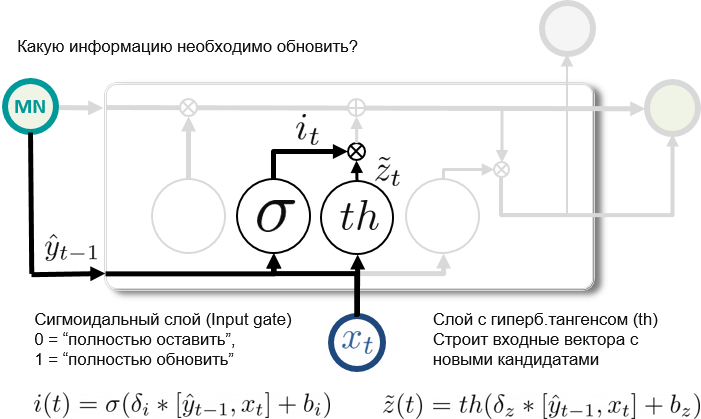

In [6]:
Image('LSTM_Core_Input_Layer_Gate.png')

$$ i(t) = \sigma (\delta_{i} * [{y}_{t-1}, x_{t}] + b_{i}) $$                          
$$ \tilde{z}(t) = th (\delta_{z} * [{y}_{t-1}, x_{t}] + b_{z}) $$

###### Обновление основного вектора ядра вычислений

После того, как мы определились с объектами трансформации - самое время внести изменения в основной вектор и произвести обновление строки состояния:

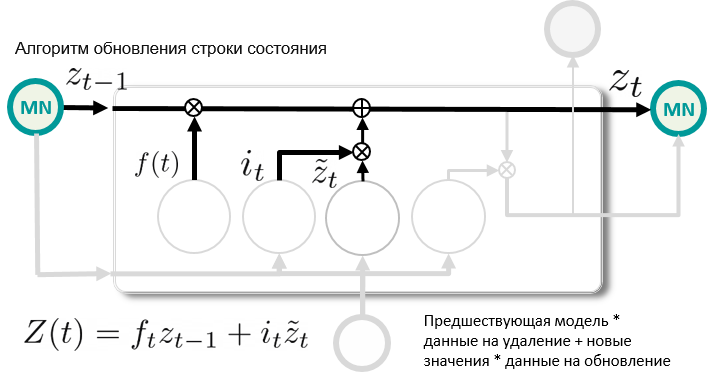

In [7]:
Image('LSTM_Core_Core-state_Vector_Changes.png')

$$ Z(t) = \alpha_{t-1} + i_{t}\tilde{z}_{t} $$

##### Моделирование и вывод данных

Наконец, необходимо определить, какая информация нам необходима на выходе. Выходные данные будут основаны на данных, расположенные в основном векторе ядра вычислений, к ним будут применены некоторые фильтры:

Сначала мы применяем сигмоидальный слой, который решает, какую информацию из состояния ячейки мы будем выводить.

Затем значения состояния ячейки проходят через tanh-слой, чтобы получить на выходе значения из диапазона от -1 до 1,

... И в завершении перемножаются с выходными значениями сигмоидального слоя, что позволяет выводить только требуемую информацию.

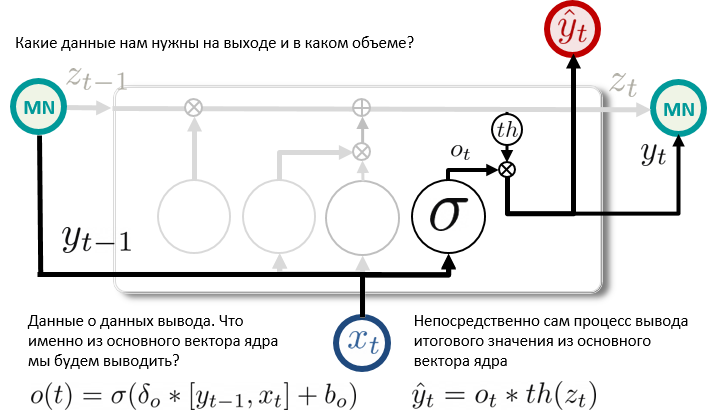

In [8]:
Image('LSTM_Core_Output_Layer_Gate.png')

$$ o(t) = \sigma (\delta_{o} * [y_{t-1}, x_{t}] + b_{o}) $$   
$$ \hat{y}_{t} = o_{t} * th (z_{t}) $$

Источник: https://habr.com/ru/company/wunderfund/blog/331310/

---------------------------------------------------------

## Основы NLP. Токенизация в Python. 

Одной из важнейших задач искусственного интелекта является моделирование иинформацию автоматизация управления текстовыми потоками информации. Область применения достаточно обширна: 

- Предиктивная аналитика в социальной инженерии (соц. сети)
- Перевод текста (лингвистика)
- Цифровые сервисы операционной поддержки бизнеса: голосовых помощниках, автоматических переводчики текста, фильтрация текста,  (поддержка организационных процессов предприятий)

В то же время нейронная сеть представляет собой прикладной инструмент для реализации математических алгоритмов и ориентировани преимущественно на работу с цифрами. Как решить задачу применения текстовых массивов данных в машинном обучении и какой алгоритм преобразования ```текст-> цифровой код -> текст``` использовать в решении конкретной задачи? на эти вопросы отвечает концепция ```Natural Language Processing```

### Natural Language Processing 

Natural Language Processing, NLP — общее направление искусственного интеллекта и математической лингвистики. Оно изучает проблемы компьютерного анализа и синтеза текстов на естественных языках. 
Применительно к искусственному интеллекту: 

- Анализ текстов на естественном языке = понимание языка;
- Моделирование = разработка алгоритмов и интеграцию компонент текста и речи; 
- Синтез текстов на естественном языке = генерацию грамотного текста.

Источник: https://ru.wikipedia.org/wiki/Обработка_естественного_языка

### Токенизация как метод преобразования данных

#### В задачах информационной безопасности

Токенизация, применяемая в области информационной безопасности, представляет собой процесс замены конфиденциального элемента данных на неконфиденциальный эквивалент, называемый токеном, который не имеет самостоятельного смысла/значения для внешнего или внутреннего использования.

#### В задачах машинного обучения

Если рассматривать токенизацию в ее функциональном аспекте и применительно к непосредственно к задачам алгоритмов машинного обучения, то этот термин можно отнести к обобщенному процессу разметки и преобразования компонентов текста в математические  идентификаторы: векторы данных 

### Основные сущности NLP, объекты

Экосистема обработки естесствнного языка имеет свою архитектуру объектов, которые составляю ядро ее сущностей:
- Токкены = обозначение векторов текстовых объектов;
- Словари = набор предикторов, встречающихся в текстовых объектах;
- Документы = последовательности векторов текстовых объектов;
- Корпусы - генеральная совокупность всех текстовых объектов.

#### Токены:
Токен = Единица текста. Токенизация = процесс проектирования и разработки архитектуры машинного обучения на основе моделей текстовых конструкций. Ими могут быть: 

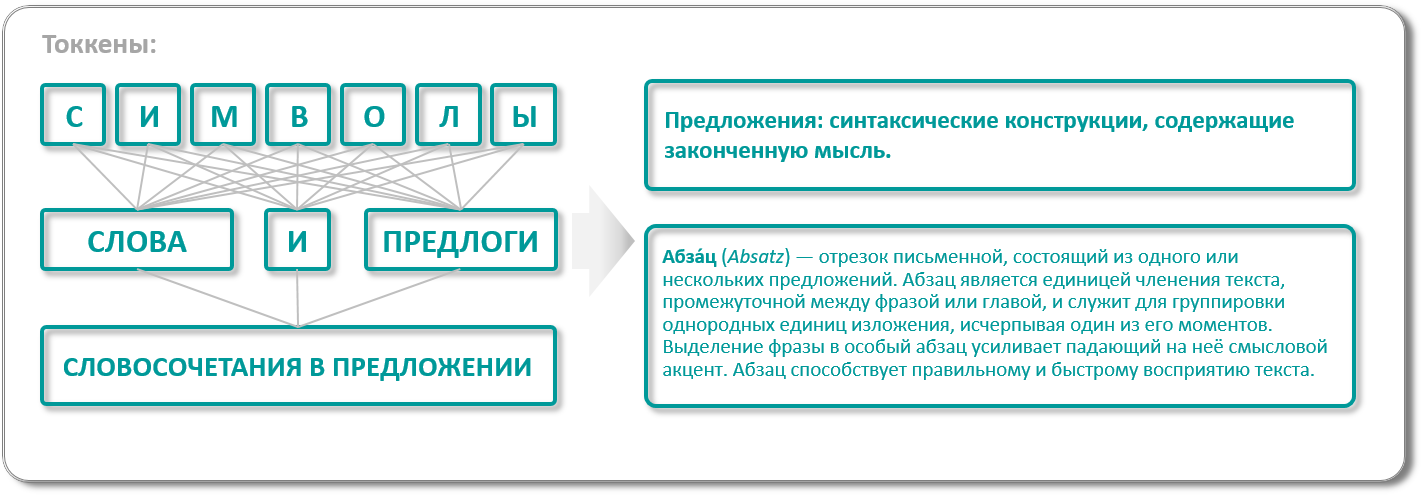

In [9]:
Image('NLP_Tokkens.png')

##### Словари:

Совокупность токкенов образуют словарь, который может быть отсортирован в определенной последовательности. Например, по алфавиту, количеству символов, структуры слов, родам, падежам и другим атрибутам части речи, морфологическим, синтаксическим, семантическим, лексическим признакам; логическим и экспрессивным признакам; моделям управления и связуемости с другими элементами лингвистических конструкций (токенами).

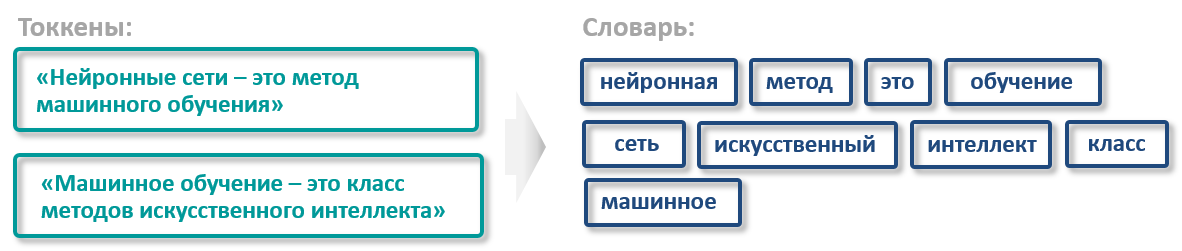

In [10]:
Image('NLP_Vocabulary.png')

##### Документы, Корпус:
Документы = Совокупность токенов, которые приндалежат к одному смысловому, концептуальному, функциональному объекту лингвистической системы: пост, комментарий, поисковый запрос, публикация, презентация и пр. \

Корпус = Генеральная совокупность всех документов.

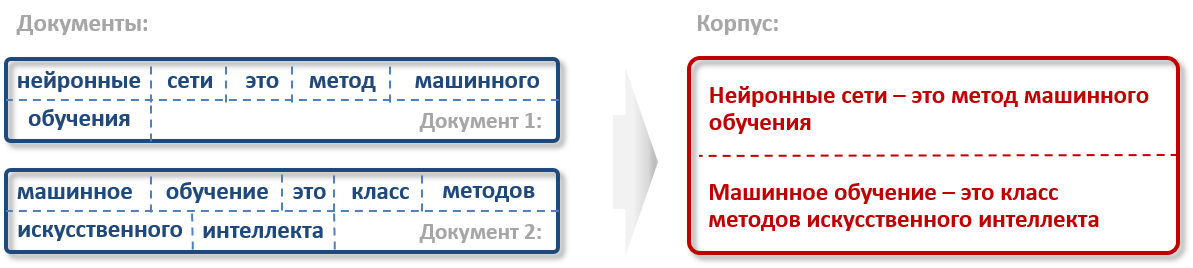

In [11]:
Image('NLP_Document & Corps.png')

### Основные задачи NLP в машинном обучении

- ##### Машинный перевод. 
Исторически значимая задача, которой занимаются эксперты достаточно продорлжительное время с конечной задачей решения вопроса высококачественного перевода (FAHQMT). Художественный перевод текстов и передача четкости смыслов, экспрессии и созвучия контекстного сочетания - основная задача специалистов машинного обучения, разрабатывающих модели анализа, обработки, моделирования и синтеза естесственног языка. 

- ##### Классификация текстов. 
Определение текстов по стилистическому, смысловому, функциональным признакам и отнесение к классам, кластерам, категориям:
    - Рубрикация. Многоклассовая классификация новостей по категориям;
    - Named-entity recognition (NER). Извлечение именнованных сущностей из тектовых данных;
    - Извлечение фактов и отношений между именнованными сущностями: объекты, классы, компоненты, элементы, связи, атрибуты (relation extraction);
    - Сентиментальный анализ. Классификация текстовых объектов на положительные, негативные, нейтральные или же иные классы, отражающие эмоциональную экспрессию; 
    - Вопросно-ответные системы. Поиск релевантных ответов на входящий вопрос из базы данных (классификация);
    - Диалоговые системы. Процесс коммуникации между объектом и субъектом отношений (классификация + прогнозирование)
    - Саммаризация. Формирование текстов меньшего объема идентичных по содержанию и смыслу; 

- ##### Ранжирование текстов.
Токенизация и моделирование векторов последовательности текстов в маркетинговых коммунимкациях, поисковых системах, социальной инженерии. 

### Токенизация в решении NER задач машинного перевода. 

## Практикум 5) 

В этом практикуме мы разберем два скрипта кода в Keras: 
- Cкрипт решения задачи прогнозирования при помощи модели LSTM: 

## Модель №1: Решение задачи прогнозирования при помощи нейронной сети LSTM

### Описание кейса

Моделируем переводчик текста при помощи LSTM. Исходники для формирования датасета берем из источник: www.manythings.org (https://www.manythings.org/anki/). Это набор данных из словарей, состоящий из последовательностей пар признак => отклик. В качестве исходного набора данных выберем последовательность пар слов на английском языке + русскоязычных значений 

---------------------------------------------------

## Очистка, оцифровка данных, подготовка к токенизации

После того, как мы провели первичную очистку данных и сформировали нужную нам размерность, данные необходимо подготовить к обучению и провести непосредственно процесс токкенизации. Для этого будем использовать метод объект-ориентированного моделирования, т.е. проводить большинство операций будем при помощи функций ```def```

Перед токенизацией проведем второй этап очистки данных. На этот раз 

Весь процесс обучения можно разделить на группу алгоритмов :

- ##### Подготовка, очистка, оцифровка текстовых данных
- ##### Подготовка модели данных (выборки и их размеры)
- ##### Создание словарей. Токенизация.
- ##### Моделирование, обучение нейронной сети
- ##### Оценка качества модели

### Подготовка, очистка, оцифровка текстовых данных

In [14]:
os.chdir ("C:\\Users\\User\Documents\GitHub\\2022_DA_ML_CaseStudies_Python_Keras\\17_NeuralNetworks_Keras_5_NLP_NER_LSTM\Datasets_LSTM_Keras") # Задаем рабочую папку с данными

Взгляните на данные и обратите внимание на то, что вы видите, которые могут помешать в обучении: 
- Присутствуют знаки пунктуации
- Текст содержит как прописные, так и строчные буквы
- Могут встречаться специальные символы, которых нет в кирилице и латинице
- Есть дублирующие фразы на английском языки в парах признак => значение
- Файл упорядочен по длине текстовых объектов

In [15]:
# Установим необходимые модули для обеспечения процесса:
import numpy as np # 
import pandas as pd # 
import matplotlib # 
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os # 

In [16]:
# Идентифицируем файл как текстовый объект (Функция load_doc).
def load_doc(filename): 
	file = open(filename, mode='rt', encoding='utf-8') # открывает файл
	text = file.read() # читает весь текст
	file.close() # закрывает текст
	return text # возвращает объект как текстовый объект

In [17]:
# Разделим загруженный файл сначало на строки, 
# ...а затем попарно (Функция to_pairs)
def to_pairs(doc):
	lines = doc.strip().split('\n')
	pairs = [line.split('\t')[:2] for line in  lines]
	return pairs

In [18]:
# Для каждой фразы и пары очистку произведем отдельно (функция clean_pairs)
def clean_pairs(lines):
	cleaned = list()
	re_print = re.compile('[^%s]' % re.escape(string.printable)) # фильтр для символов
	table = str.maketrans('', '', string.punctuation) # таблица для удаляемых знаков пунктуации
	for pair in lines:
		clean_pair = list()
		for line in pair:
			line = normalize('NFD', line).encode('ascii', 'ignore') # Нормализует символу Юникода в ASCII
			line = line.decode('UTF-8')
			line = line.split() # маркирует пробеллы
			line = [word.lower() for word in line] # преобразовывает текст в нижний регистр
			line = [word.translate(table) for word in line] # удаляет пунктуацию для каждого объекта (токкена)
			line = [re_print.sub('', w) for w in line] # удаляет нечитаемые символы для каждого объекта (токена)
			line = [word for word in line if word.isalpha()] # удаляет в объектах (токенах) цифровые символы
			clean_pair.append(' '.join(line)) # ... и сохраняет текст в качестве строки
		cleaned.append(clean_pair)
	return array(cleaned)

##### Сохранение очищенного текста в модель данных

Теперь, когда текстовые данные прошли очистку, нужно сохранить список пар фраз в файл. Алгоритм интеграции в архитектуру модели выглядит так:
- Загрузим документ с очищенным текстом в память
- Фрагментируем текст загруженного файла на объекты пар = предложения (sentence)
- Проведем очистку списка строк
- Сохраним список очищенных предложений (sentence) в файл

In [19]:
# save a list of clean sentences to file
def save_clean_data(sentences, filename):
	dump(sentences, open(filename, 'wb'))
	print('Saved: %s' % filename)

Мы задали функцию очистки данных от лишних и нечитаемых символов, нормализовали символы Юникода, промаркировали пробелы. Данная функция описывает шаблон очистки данных, предназначенный для очистки и разметки текста. После того, как описана очистка мы можем приступить к описанию текстовых пар 

------------------------

##### Преобразование модели данных с очищенным текстом в датасет

После того, как очищенные данные сохранены в файл, необходимо преобразовать их в датасет. Функция save_clean_data () использует API pickle для сохранения списка чистого текста в файл. Алгоритм итераций:
- Загружаем очищенный датасет;
- Проводим разделение на пары и их очистку
- Запись в формат pkl

In [20]:
# Установим необходимые модули для обеспечения процесса:
import string
import re
from pickle import load
from pickle import dump
from unicodedata import normalize
from numpy import array

In [21]:
# Загрузим очищенный датасет (Функция doc)
filename = 'en_rus_dictionary.txt'
doc = load_doc(filename)

In [22]:
# проведем разделение на пары eng_rus
pairs = to_pairs(doc) # разделяет на пары # разделяет на пары

In [23]:
pairs[10 :20]

[['Run!', 'Бегите!'],
 ['Run.', 'Беги!'],
 ['Run.', 'Бегите!'],
 ['Who?', 'Кто?'],
 ['Wow!', 'Вот это да!'],
 ['Wow!', 'Круто!'],
 ['Wow!', 'Здорово!'],
 ['Wow!', 'Ух ты!'],
 ['Wow!', 'Ого!'],
 ['Wow!', 'Вах!']]

In [48]:
# проведем очистку пар eng_rus
clean_pairs = clean_pairs(pairs)

MemoryError: Unable to allocate 1.75 GiB for an array with shape (444587, 2) and data type <U527

In [49]:
clean_pairs[:10]

TypeError: 'function' object is not subscriptable

In [50]:
clean_pairs = array(clean_pairs, dtype='object') # пары задаем как массив и объект

In [63]:
# Сохраним очищенные данные в txt
save_clean_data(clean_pairs, 'eng_rus_dictionary_finalcleaned_end.txt')

Saved: eng_rus_dictionary_finalcleaned_end.txt


In [64]:
# # Сохраним очищенные данные в pkl(использует API pickle 
# для сохранения списка чистого текста в файл pkl
save_clean_data(clean_pairs, 'eng_rus_dictionary_hardcleaned_2.pkl')

Saved: eng_rus_dictionary_hardcleaned_2.pkl


In [65]:
# проводит выборочную проверку
for i in range(1000):
	print('[%s] => [%s]' % (clean_pairs[i,1], clean_pairs[i,1]))

[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[] => []
[

### Подготовка модели данных (выборки и их размеры)

Чистые данные содержат более 400.000 пар фраз (sentence), чего вполне достаточно для разработки сложной модели перевода. Сложность модели возрастает с увеличением количества примеров, длины фраз и объема словарного запаса. Упростим задачу, так как нам требуется несложная модель. Это сэкономит время на обучение, необходимое для демонстрации работы нейронной сети в решении задач прогнозирования на примере машинного перевода 

Нам понадобятся первые 10000 примеров в файле; это будут самые короткие фразы в наборе данных. Далее, мы поставим первые 9 000 из них на обучающую выборку, оставшиеся 1000 примеров для тестирования. 

Нам понадобятся новые файлы, а алгоритм сплитования будет следующим:

##### Подготовка выборки к сплитованию (перевод предложений в цифровой код)
- Проведем загрузку очищенного датасета
- Сохраним список очищенных строк в файл
- Загрузим необработанный датасет pkl
- Уменьшим размер датасета. Оставим первые 10 000 строк с короткими предложениями
- Перемешаем строки местами случайным образом

##### Разделение оцифрованного набора данных на обучающую и тестовую выборки
- Разделение выборки
- Маркировка данных по $ X $ и $ Y $
- Сохранение обучающих выборок в файлы

In [18]:
# Установим необходимые модули для обеспечения процесса:
from pickle import load # 
from pickle import dump #
from numpy.random import rand #
from numpy.random import shuffle #

In [ ]:
# Подготовка и загрузка шаблонов очищенных данных

In [67]:
# Зададим функцию загрузки шаблона датасета (Функция load_clean_sentences)
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

In [68]:
# Зададим функцию сохранения очищенных строк в файл
def save_clean_data(sentences, eng_rus_dictionary_hardcleaned):
	dump(sentences, open(eng_rus_dictionary_hardcleaned, 'wb'))
	print('Saved: %s' % eng_rus_dictionary_hardcleaned)

In [69]:
# Проведем загрузку необработанного датасета
raw_dataset = load_clean_sentences('eng_rus_dictionary_finalcleaned_end.txt')

In [70]:
# Уменьшим размер датасета (зачем?)
n_sentences = 10000
dataset = raw_dataset[:n_sentences, :]

In [71]:
# Перемешаем строки местами случайным образом
shuffle(dataset)

Теперь данные в цифровом виде готовы. Разобьем массив на два блока для входных (оцифрованные данные русскоязычных объектов) и выходных (оцифрованные данные англоязычных объектов) данных. Также подготовим отдельный блок для валидации процесса обучения.

In [72]:
# Создадим щаблон тестовой и обучающей модели
ntest=dataset.shape[0]//10
train, test = dataset[:-ntest], dataset[-ntest:]
print(train.shape,test.shape)

# Вариант 2: Формируем обучающую и тестовую выборки:
# train, test = dataset[:9000], dataset[9000:]

# Вариант 3: когда выбираем соотношение и делим рандомно:
# train, test = train_test_split(eng_rus_dictionary_hardcleaned, test_size=0.2,

(9000, 2) (1000, 2)


... и сохраняем общую, тестовую и обучающие выборки в файл

In [73]:
# Сохраним шаблоны выборок в файлы txt
save_clean_data(dataset, 'eng_rus_dictionary_FINAL_all.txt')
save_clean_data(train, 'eng_rus_dictionary_FINAL_train.txt')
save_clean_data(test, 'eng_rus_dictionary_FINAL_test.txt')

Saved: eng_rus_dictionary_FINAL_all.txt
Saved: eng_rus_dictionary_FINAL_train.txt
Saved: eng_rus_dictionary_FINAL_test.txt


In [74]:
# Сохраним шаблоны выборок в файлы pkl
save_clean_data(dataset, 'eng_rus_dictionary_FINAL_all.pkl')
save_clean_data(train, 'eng_rus_dictionary_FINAL_train.pkl')
save_clean_data(test, 'eng_rus_dictionary_FINAL_test.pkl')

Saved: eng_rus_dictionary_FINAL_all.pkl
Saved: eng_rus_dictionary_FINAL_train.pkl
Saved: eng_rus_dictionary_FINAL_test.pkl


Мы подготовили модель данных: создали нужную размерность, загрузили шаблоны чистых строк, распределили по выборкам для последующей обработки. На основе этого файла и будем строить словари и проводить токенизацию модели данных

----------------------------------------

### Создание словарей. Токенизация.

Основная задача токенизации - преобразование слов и их цифровых кодов в целые числа. Так, чтобы слово (токен) = 12345. Каждый оцифрованный токен затем будет преобразован в бинарный код слово (токен) = 011001 с определение принадлежности в паре rus_eng. Причем отдельно для русскоязычных признаков, отдельно для англоязычных значений.

##### Загрузка шаблона очищенного датасета и выборки
- Загрузим очищенные предложения 
##### Обучение токенизатора
- Создадим модель обучения токенизатора
- Зададим максимальную размерность токена (по величине самого длинного предложения).
- Преобразуем данные в массив (Функция encode_sequences)
- Зададим принадлежность цифровой модели токена к значению
- Создадим тестовый алгоритм токенизатора
- ... создадим токенизаторы для откликов (англоязычная часть предложения)
- ... создадим токенизаторы для предикторов (русскоязычная часть предложения)

В ходе выполнения алгоритма нам важно преобразовать слова в цифровой бинарный код и при этом сохранить принадлежность полученных последовательностей в каждой паре.  

In [113]:
# Установим необходимые модули для обеспечения процесса:
from keras.preprocessing.text import Tokenizer # сам модуль токенизатора
from keras.preprocessing.text import one_hot # модуль энкодера бинарных признаков => принадлежность к значению:
from keras_preprocessing.sequence import pad_sequences # модуль преобразования списка последовательностей в массив
from tensorflow.keras.utils import to_categorical

У нас есть три набора данных. Начнем с загрузки наборов данных, чтобы мы могли подготовить данные. Функция load_clean_sentences ()может использоваться для зэтих данных по очереди. Некотрые функции алгоритма вам уже знакомы, с них и начинаем

In [98]:
# Зададим функцию выгрузки шаблонов очищенных строк (load_clean_sentences)
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

Основная задача токенизации - преобразование слов и их цифровых кодов в целые числа. Так, чтобы ```слово (токен)``` = ```12345``` причем отдельно для русскоязычных признаков, отдельно для англоязычных значений. 

In [99]:
# Создадим функцию обучения токенизатора. (Функция create_tokenizer)
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

В нашем датасете присутствуют токкены, включающие словосочетания и предложения. По которым модель будет определять максимакльную длину перевода:

In [100]:
# Определим максимальную длину токена. (Функция max_length)
def max_length(lines):
	return max(len(line.split()) for line in lines)

ВНИМАНИЕ! ----------------------------

In [ ]:
# Зададим функции оцифровки токена 

In [101]:
# Преобразуем данные в массив (Функция encode_sequences)
def encode_sequences(tokenizer, length, lines):
	X = tokenizer.texts_to_sequences(lines) # последовательности с целочисленным кодом (1)
	X = pad_sequences(X, maxlen=length, padding='post') # последовательности с 0 значением (0)
	return X

In [102]:
# Зададим функцию принадлежность оцифрованной модели токена к значению (encode_output)
def encode_output(sequences, vocab_size):
	ylist = list()
	for sequence in sequences:
		encoded = to_categorical(sequence, num_classes=vocab_size)
		ylist.append(encoded)
	y = array(ylist)
	y = y.reshape(sequences.shape[0], sequences.shape[1], vocab_size)
	return y

В скрипте алгоритма создания словарей будут также функции, которые нам понадобятся далее в процессе оптимизации модели. К ним мы вернемся после первой итерации обучения... 

Мы подготовили модель токенизатора: Загрузили шаблон чистых строк, обучили его, задали максимальную размерность токена, описали функцию оцифровки токена, функцию принадлежности словарных пар и сделали посев в модель "предиктор => значение". На основе этих функций создадим токенизаторы отдельно для словаря ```eng``` и словаря ```rus```

ВНИМАНИЕ! ----------------------------

In [ ]:
# Подготовим токенизаторы

In [103]:
# Выгружаем данные
dataset = load_clean_sentences('eng_rus_dictionary_FINAL_all.txt')
train = load_clean_sentences('eng_rus_dictionary_FINAL_train.txt')
test = load_clean_sentences('eng_rus_dictionary_FINAL_test.txt')

In [104]:
# Подготавливаем токенизатор для словаря eng
eng_tokenizer = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])
print('English Vocabulary Size: %d' % eng_vocab_size)
print('English Max Length: %d' % (eng_length))

English Vocabulary Size: 1703
English Max Length: 4


In [105]:
# # Подготавливаем токенизатор для словаря rus
rus_tokenizer = create_tokenizer(dataset[:, 1])
rus_vocab_size = len(rus_tokenizer.word_index) + 1
rus_length = max_length(dataset[:, 1])
print('Russian Vocabulary Size: %d' % rus_vocab_size)
print('Russian Max Length: %d' % (rus_length))

Russian Vocabulary Size: 3
Russian Max Length: 1


In [ ]:
# Интегрируем токенизаторы в модели данных

In [106]:
# В тренировочную выборку
trainX = encode_sequences(rus_tokenizer, rus_length, train[:, 1])
trainY = encode_sequences(eng_tokenizer, eng_length, train[:, 0])
trainY = encode_output(trainY, eng_vocab_size)

In [107]:
# в тестовую выборку
testX = encode_sequences(rus_tokenizer, rus_length, test[:, 1])
testY = encode_sequences(eng_tokenizer, eng_length, test[:, 0])
testY = encode_output(testY, eng_vocab_size)

Мы создали и интегрировали в нашу модель данных токенизаторы: выгрузили данные выборок, описали модель поведения токенизатора в пространстве данных, интегрировали токенизатор в модели выборок. Данные полностью готовы для того, чтобы начать обучени. Теперь приступим к непосредственно самой нейронной сети. 

---------------------------------------------------

### Моделирование нейронной сети

Как вы, наверное уже поняли, основным циклом, вокруг которого выстраивается весь механизм перевода является цикл кодирования-декодирования поступаемых токенов на входе и выходе. Для решения этой задачи мы и будем использовать модель LSTM в качестве кодера-декодера. 

Вспомним схему ядра вычислений модели LSTM: входная последовательность кодируется внешней моделью, называемой кодером, а скрытые нейроны декодируют слова при помощи  внутренней модели, которая называется декодером. 

Таким образом модель LSTM использует свою особенность возвращать на вход вычислительного ядра результаты предшествующих вычислений для возврата кодировки предложения исходного предложения, а затем копирует эту кодировку на входе. 

In [116]:
# Установим необходимые модули для обеспечения процесса:
from tensorflow.keras.models import Sequential #
from tensorflow.keras.layers import LSTM #
from tensorflow.keras.layers import Dense #
from tensorflow.keras.layers import Embedding #
from tensorflow.keras.layers import RepeatVector #
from tensorflow.keras.layers import TimeDistributed #

from tensorflow.keras.utils import plot_model

Сейчас мы должны определить саму архитектуру модели, а также принять ряд аргументов, используемых для настройки модели: размер словарей ввода и вывода, максимальная длина фраз ввода и вывода и количество единиц памяти, используемых для настройки модели и пр. Сделаем это при помощи функции ```define_model```

In [109]:
# Определим модель нейронного машинного перевода (NMT) 
def define_model(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
	model = Sequential() # определяем модель для простого стека слоев (каркас с одним входным и выходным тензором)
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True)) # source word embedding
	model.add(LSTM(n_units)) # LSTMs to generate setence encoding
	model.add(RepeatVector(tar_timesteps)) # repeat source encoding over target sequence
	model.add(LSTM(n_units, return_sequences=True)) # LSTMs to generate target sentence
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax'))) # Dense network to produce distribution over target vocabulary
	return model

In [111]:
# Сращиваем модель с гипперпараметрами: "движок"
model = define_model(rus_vocab_size, eng_vocab_size, rus_length, eng_length, 256)
model.compile(optimizer='adam', loss='categorical_crossentropy')

Комментарии:_В решаемой задаче в качестве оптимизатора будем применять```adam``` в качестве альтернативы ```sgd``` loss-функцией потерь будет ```categorical_crossentropy```(Вопрос: почему?). Ответ: У нас есть цикл кодирования-декодирования, а это уже подзадача классификации (в надзадаче прогнозирования). Функция ```categorical_crossentropy``` как раз используется тогда, когда необходимо распознать больше чем 2 класса, а классы закодированны числами, что и есть наш случай. 

Посколько мы сформулировали проблему прогнозирования как мультиклассовую классификацию, поле для творчества - огромное. Данную модель можно применять в качестве платформы для новых разработок. Выведем сводку по модели:

In [114]:
# Выводим структуру модели в блокнот
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 256)            768       
                                                                 
 lstm (LSTM)                 (None, 256)               525312    
                                                                 
 repeat_vector (RepeatVector  (None, 4, 256)           0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 4, 256)            525312    
                                                                 
 time_distributed (TimeDistr  (None, 4, 1703)          437671    
 ibuted)                                                         
                                                                 
Total params: 1,489,063
Trainable params: 1,489,063
Non-

#### Контрольная карта: 

Подведем промежуточный итог: мы имеем все необходимое, чтобы приступить к обучению: 
- очишенный набор данных, 
- модель данных, 
- система кодировки-декодировки токенов, 
- датасеты обучающей и тестовой выборки, 
- построенная модель нейронной сети с выбранными исходными гипперпараметрами

---------------------------------

### Обучение нейронной сети

Каждая эпоха занимает около 30 секунд на современном оборудовании процессора; графический процессор не требуется.

По результатам обучения модель будет подготовлена к следующему этапу и сохранена в файл ```model.h5```

In [117]:
# Установим необходимые модули для обеспечения процесса:
from tensorflow.keras.callbacks import ModelCheckpoint

Комментарии: 
- ```Monitor``` _ 
- ```Save_best_only``` _ 
- ```Epochs``` _ 
- ```batch_size``` _ 

In [118]:
# Проведем обучение модели
filename = 'model.h5' # создадим checkpoint для сохранения модели в каждм цикле обучения
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# 1-2-3 Поехали! (старт обучение на обучающей выборке)
model.fit(trainX, trainY, epochs=30, batch_size=64, validation_data=(testX, testY), callbacks=[checkpoint], verbose=2) 

Epoch 1/30

Epoch 1: val_loss improved from inf to 4.47189, saving model to model.h5
141/141 - 33s - loss: 5.1928 - val_loss: 4.4719 - 33s/epoch - 233ms/step
Epoch 2/30

Epoch 2: val_loss improved from 4.47189 to 4.30137, saving model to model.h5
141/141 - 16s - loss: 4.4102 - val_loss: 4.3014 - 16s/epoch - 111ms/step
Epoch 3/30

Epoch 3: val_loss improved from 4.30137 to 4.09282, saving model to model.h5
141/141 - 14s - loss: 4.1843 - val_loss: 4.0928 - 14s/epoch - 99ms/step
Epoch 4/30

Epoch 4: val_loss improved from 4.09282 to 3.79481, saving model to model.h5
141/141 - 15s - loss: 3.9050 - val_loss: 3.7948 - 15s/epoch - 106ms/step
Epoch 5/30

Epoch 5: val_loss improved from 3.79481 to 3.70068, saving model to model.h5
141/141 - 15s - loss: 3.7035 - val_loss: 3.7007 - 15s/epoch - 108ms/step
Epoch 6/30

Epoch 6: val_loss improved from 3.70068 to 3.65980, saving model to model.h5
141/141 - 14s - loss: 3.6299 - val_loss: 3.6598 - 14s/epoch - 98ms/step
Epoch 7/30

Epoch 7: val_loss impr

Мы обучили модель нейронной сети. Переходим к алгоритму оценки качества модели. Напомню, что данная модель представлена в дефолтном виде и ее можно улучшать

---------------------------------

### Оценка качества обучения 

В идеале мы должны использовать отдельный набор данных для оценки качества, чтобы в дальнейшам выбрать оптимальный вариант. Однако сейчас мы будем оценивать качество модели на обеих выборках. Модель одинаково должна хорошо работать как на тренировочной, так и на тестовой выборке.

Алгоритм оценки качества выглядит так
- Зададим все необходимые функции выгрузки шаблонов данных 
- Зададим функции предобученного токенизатора
- Зададим функцию оценки производительности модели
- Отправляем токенизаторы в датасеты 
- Формируем входные векторы из rus
- Загружаем тестируемую модель
- Оцениваем качество перевода на парах из обеих выборок 

In [130]:
# Установим необходимые модули для обеспечения процесса:
from tensorflow.keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu
from numpy import argmax

In [ ]:
# Зададим все необходимые функции выгрузки шаблонов данных 
# Предобученного токенизатора

In [123]:
# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# max sentence length
def max_length(lines):
	return max(len(line.split()) for line in lines)

# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
	# integer encode sequences
	X = tokenizer.texts_to_sequences(lines)
	# pad sequences with 0 values
	X = pad_sequences(X, maxlen=length, padding='post')
	return X

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate target given source sequence
def predict_sequence(model, tokenizer, source):
	prediction = model.predict(source, verbose=0)[0]
	integers = [argmax(vector) for vector in prediction]
	target = list()
	for i in integers:
		word = word_for_id(i, tokenizer)
		if word is None:
			break
		target.append(word)
	return ' '.join(target)

In [ ]:
# Зададим функцию оценки производительности модели

In [124]:
# Зададим функцию оценки производительности модели (функция evaluate_model)
def evaluate_model(model, tokenizer, sources, raw_dataset):
	actual, predicted = list(), list()
	for i, source in enumerate(sources):
		# translate encoded source text
		source = source.reshape((1, source.shape[0]))
		translation = predict_sequence(model, eng_tokenizer, source)
		raw_target, raw_src = raw_dataset[i]
		if i < 10:
			print('src=[%s], target=[%s], predicted=[%s]' % (raw_src, raw_target, translation))
		actual.append(raw_target.split())
		predicted.append(translation.split())
        
        # Посчитаем  BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))
        

In [ ]:
# Отправляем токенизаторы в датасеты 

In [125]:
# Выгружаем данные
dataset = load_clean_sentences('eng_rus_dictionary_FINAL_all.txt')
train = load_clean_sentences('eng_rus_dictionary_FINAL_train.txt')
test = load_clean_sentences('eng_rus_dictionary_FINAL_test.txt')

In [126]:
# Подготавливаем токенизатор для словаря eng
eng_tokenizer = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])
print('English Vocabulary Size: %d' % eng_vocab_size)
print('English Max Length: %d' % (eng_length))

# Подготавливаем токенизатор для словаря rus
rus_tokenizer = create_tokenizer(dataset[:, 1])
rus_vocab_size = len(rus_tokenizer.word_index) + 1
rus_length = max_length(dataset[:, 1])
print('Russian Vocabulary Size: %d' % rus_vocab_size)
print('Russian Max Length: %d' % (rus_length))

English Vocabulary Size: 1703
English Max Length: 4
Russian Vocabulary Size: 3
Russian Max Length: 1


In [ ]:
# Формируем входные векторы из rus

In [127]:
# Задаем предикторы (rus) из тесктовой и из обучающей)
trainX = encode_sequences(rus_tokenizer, rus_length, train[:, 1])
testX = encode_sequences(rus_tokenizer, rus_length, test[:, 1])

In [ ]:
# Загружаем тестируемую модель

In [128]:
model = load_model('model.h5')

In [ ]:
# Оцениваем качество на строчках из обеих выборках 

In [131]:
# На примерах из обучающей выборки
print('***** train')
evaluate_model(model, eng_tokenizer, trainX, train)

***** train
src=[], target=[get in line], predicted=[i it]
src=[], target=[let me try], predicted=[i it]
src=[], target=[perfect], predicted=[i it]
src=[], target=[iron is hard], predicted=[i it]
src=[], target=[get lost], predicted=[i it]
src=[], target=[youre brave], predicted=[i it]
src=[], target=[please do it], predicted=[i it]
src=[], target=[youre vain], predicted=[i it]
src=[], target=[will you go], predicted=[i it]
src=[], target=[i like that], predicted=[i it]


C:\Users\User\anaconda3\Anaconda3 (final)\lib\site-packages\nltk\translate\bleu_score.py:515: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\User\anaconda3\Anaconda3 (final)\lib\site-packages\nltk\translate\bleu_score.py:515: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\User\anaconda3\Anaconda3 (final)\lib\site-packages\nltk\translate\bleu_score.py:515: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using low

BLEU-1: 0.258214
BLEU-2: 0.000000
BLEU-3: 0.000000
BLEU-4: 0.000000


In [ ]:
# На примерах из тестовой выборки
print('***** test')
evaluate_model(model, eng_tokenizer, testX, test)

------------------------------------------

### Завершение занятия

В этой части мы изучили: 
- Разобрали базовые процессы (1-й итерации) алгоритма обучения нейронной сети (Перечислите основные процессы обучения 1-й итерации?)
- Основыные гипперпараметры нейросети, с которой работает ML-инжинер (Назовите их?)
- Основныем модели loss-функций и область применения (Назовите основные виды Loss-функций? Соотнесите их с задачами машинного обучения?)
- Базовые схемы инициализации нейронной сети и рекоммендации к их моделированию (Назовите основные модели инициализации основных значений весов? Назовити основные рекоммендации для инициализации свободных членов?
- Алгоритм управления гипперпараметром опптимизаци и писать код оптимизаци (расшифруйте атрибуты кода sgd2)
- Алгоритм управления гипперпараметром инициализации и вносить изменения в модель нейросети (расшифруйте атрибуты кода init_2 = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=12345; Что такое зерна инициализации и для чео они нужны?)
- Закрепили на практике алгоритмы 1-й итерации обучения нейросети на примере задачи классификации.

Темы следующего занятия:
    
- Нейронные сети в задачах распознавания изображений
- Сверточная нейронная сеть Convolution Neural Network. Введение
- Главные компоненты сверточной нейронной сети
- Архитектурная парадигма сверточных нейронных сетей
- Субдискретизация 